In [213]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [214]:
df = pd.read_csv('hr.csv')

In [215]:
df.head()

,Age,Attrition,Attrition Code,BusinessTravel,Business Travel Code,DailyRate,Department,DistanceFromHome,Education,EducationField,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,39,No,0,Non-Travel,0,105,Research & Development,9,3,Life Sciences,...,3,80,0,21,3,2,6,0,1,3
1,44,No,0,Non-Travel,0,111,Research & Development,17,3,Life Sciences,...,4,80,0,6,3,3,0,0,0,0
2,50,No,0,Non-Travel,0,145,Sales,1,3,Life Sciences,...,1,80,1,19,3,3,18,7,0,13
3,30,No,0,Non-Travel,0,111,Research & Development,9,3,Medical,...,3,80,2,12,4,3,12,9,6,10
4,37,No,0,Non-Travel,0,142,Sales,9,4,Medical,...,4,80,1,9,6,3,9,5,7,7


In [216]:
df.describe()

,Age,Attrition Code,Business Travel Code,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender Code,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,0.161224,1.086395,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,0.400000,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,0.367863,0.532170,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,0.490065,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,0.000000,0.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,0.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,1.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,0.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.000000,1.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,0.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,0.000000,1.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,1.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1.000000,2.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,1.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


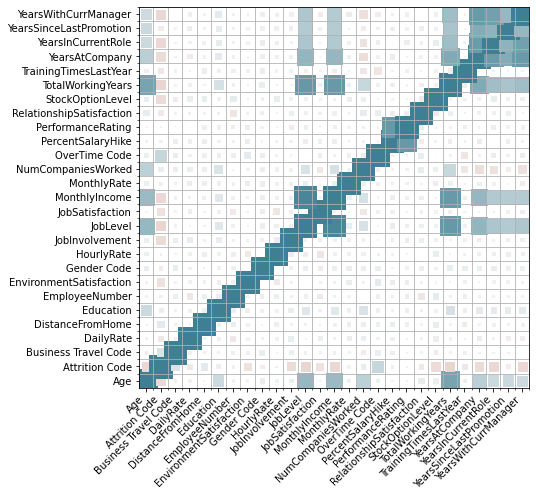

In [217]:
import math
# Makes a correlation matrix

n_colors = 256 # Use 256 colors for the diverging color palette
palette = sns.diverging_palette(20, 220, n=n_colors) # Create the palette
color_min, color_max = [-1, 1] # Range of values that will be mapped to the palette, i.e. min and max possible correlation


def value_to_color(val):
    val_position = float((val - color_min)) / (color_max - color_min) # position of value in the input range, relative to the length of the input range
    ind = int(val_position * (n_colors - 1)) # target index in the color palette
    return palette[ind]

def heatmap(x, y, color, size):    
    fig, ax = plt.subplots(figsize = (7,7))
    
    x_labels = [v for v in sorted(x.unique())]
    y_labels = [v for v in sorted(y.unique())]
    x_to_num = {p[1]:p[0] for p in enumerate(x_labels)} 
    y_to_num = {p[1]:p[0] for p in enumerate(y_labels)} 
    
    size_scale = 500
    ax.scatter(
        x=x.map(x_to_num),
        y=y.map(y_to_num),
        s=size * size_scale,
        c=color.apply(value_to_color), # Vector of square color values, mapped to color palette
        marker='s'
    ) 
    
    # Show column labels on the axes
    ax.set_xticks([x_to_num[v] for v in x_labels])
    ax.set_xticklabels(x_labels, rotation=45, horizontalalignment='right')
    ax.set_yticks([y_to_num[v] for v in y_labels])
    ax.set_yticklabels(y_labels)
    ax.grid(False, 'major')
    ax.grid(True, 'minor')
    ax.set_xticks([t + 0.5 for t in ax.get_xticks()], minor=True)
    ax.set_yticks([t + 0.5 for t in ax.get_yticks()], minor=True)
    
    ax.set_xlim([-0.5, max([v for v in x_to_num.values()]) + 0.5]) 
    ax.set_ylim([-0.5, max([v for v in y_to_num.values()]) + 0.5])

# select the float columns
# df_num = df.select_dtypes(include=[float])

columns = ['Age','Attrition Code','Business Travel Code','DailyRate','DistanceFromHome','Education','EmployeeNumber','EnvironmentSatisfaction','Gender Code','HourlyRate','JobInvolvement','JobLevel','JobSatisfaction','MonthlyIncome','MonthlyRate','NumCompaniesWorked','OverTime Code','PercentSalaryHike','PerformanceRating','RelationshipSatisfaction','StockOptionLevel','TotalWorkingYears','TrainingTimesLastYear','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']

corr = df[columns].corr()
corr = pd.melt(corr.reset_index(), id_vars='index') # Unpivot the dataframe, so we can get pair of arrays for x and y
corr.columns = ['x', 'y', 'value']
heatmap(
    x=corr['x'],
    y=corr['y'],
    color=corr['value'],
    size=corr['value'].abs()
)

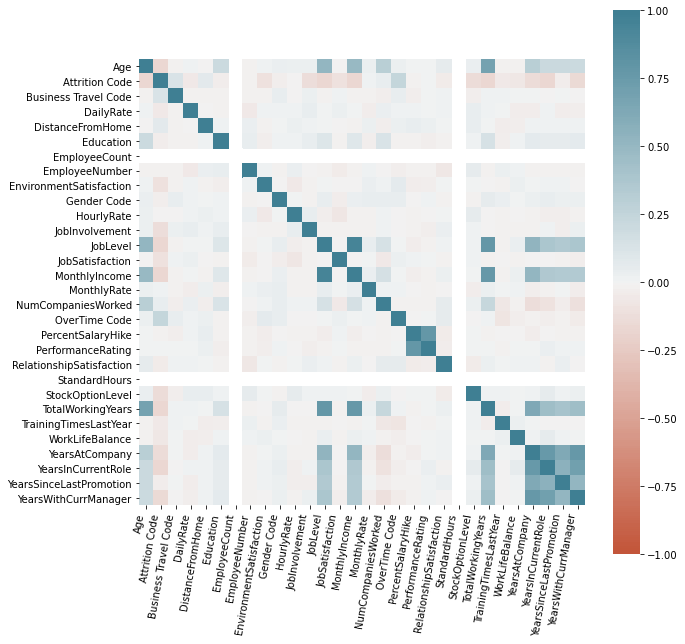

In [218]:
corr = df.corr()
plt.figure(figsize = (10,10))

ax = sns.heatmap(
    corr,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=80,
    horizontalalignment='right'
);

ax.set_yticklabels(
    ax.get_yticklabels(),
    horizontalalignment='right'
);

Text(0.5, 1.0, 'Monthly Income Wise YearsAtCompany Distribution')

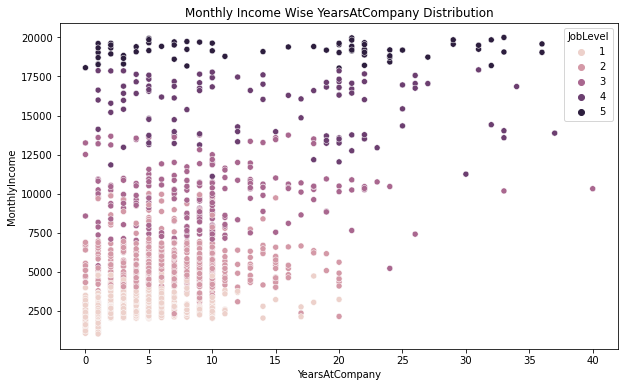

In [219]:
plt.figure(figsize=(10, 6))
children5 = df['JobLevel'].value_counts()
sns.scatterplot(x = "YearsAtCompany", y = "MonthlyIncome", hue='JobLevel', data = df)
plt.title('Monthly Income Wise YearsAtCompany Distribution')

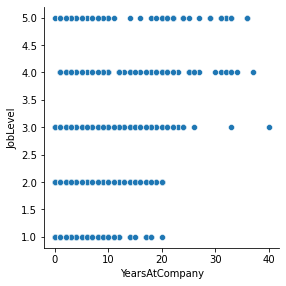

In [220]:
sns.pairplot(df, x_vars=['YearsAtCompany'], 
             y_vars='JobLevel', height=4, aspect=1, kind='scatter')
plt.show()

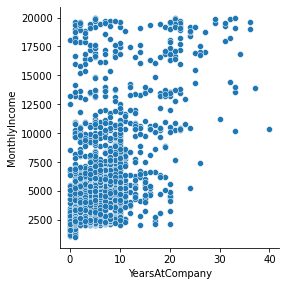

In [221]:
sns.pairplot(df, x_vars=['YearsAtCompany'], 
             y_vars='MonthlyIncome', height=4, aspect=1, kind='scatter')
plt.show()

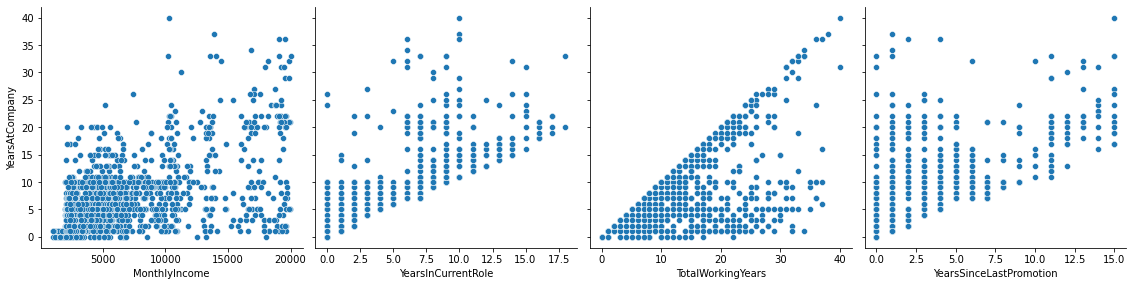

In [222]:
sns.pairplot(df, x_vars=['MonthlyIncome', 'YearsInCurrentRole', 'TotalWorkingYears','YearsSinceLastPromotion'], 
             y_vars='YearsAtCompany', height=4, aspect=1, kind='scatter')
plt.show()

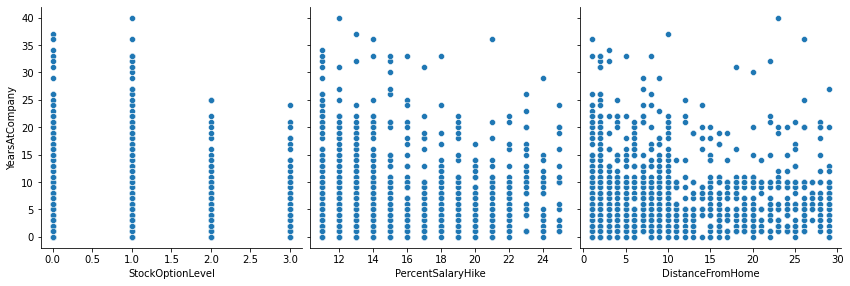

In [223]:
sns.pairplot(df, x_vars=['StockOptionLevel', 'PercentSalaryHike','DistanceFromHome'], 
             y_vars='YearsAtCompany', height=4, aspect=1, kind='scatter')
plt.show()

In [224]:
df.columns.values

array(['Age', 'Attrition', 'Attrition Code', 'BusinessTravel',
       'Business Travel Code', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender',
       'Gender Code', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'Over18', 'OverTime',
       'OverTime Code', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'], dtype=object)

In [265]:
# Creating X and y, y2 for YearsAtCompany regression
y = df['MonthlyIncome']
y2 = df['YearsSinceLastPromotion']
X = df['YearsAtCompany']

In [266]:
y3 = df['YearsWithCurrManager']
y4 = df['TotalWorkingYears']
y5 = df['NumCompaniesWorked']
y6 = df['JobLevel']

In [267]:
# Splitting the varaibles as training and testing
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, 
                                                    test_size = 0.3, random_state = 100)

X_train, X_test, y2_train, y2_test = train_test_split(X, y2, train_size = 0.7, 
                                                    test_size = 0.3, random_state = 100)

X_train, X_test, y3_train, y3_test = train_test_split(X, y3, train_size = 0.7, 
                                                    test_size = 0.3, random_state = 100)

X_train, X_test, y4_train, y4_test = train_test_split(X, y4, train_size = 0.7, 
                                                    test_size = 0.3, random_state = 100)

X_train, X_test, y5_train, y5_test = train_test_split(X, y5, train_size = 0.7, 
                                                    test_size = 0.3, random_state = 100)

X_train, X_test, y6_train, y6_test = train_test_split(X, y6, train_size = 0.7, 
                                                    test_size = 0.3, random_state = 100)

In [268]:
# Adding a constant to get an intercept
X_train_sm = sm.add_constant(X_train)

In [269]:
# Fitting the resgression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()
lr2 = sm.OLS(y2_train, X_train_sm).fit()
lr3 = sm.OLS(y3_train, X_train_sm).fit()
lr4 = sm.OLS(y4_train, X_train_sm).fit()
lr5 = sm.OLS(y5_train, X_train_sm).fit()
lr6 = sm.OLS(y6_train, X_train_sm).fit()

# Printing the parameters
lr.params

const             6873.935748
Attrition Code   -1876.421297
dtype: float64

In [270]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          MonthlyIncome   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     23.34
Date:                Sun, 07 Nov 2021   Prob (F-statistic):           1.56e-06
Time:                        14:51:02   Log-Likelihood:                -10151.
No. Observations:                1029   AIC:                         2.031e+04
Df Residuals:                    1027   BIC:                         2.032e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           6873.9357    159.241     43.167      0.000    6561.461    7186.411
Attrition Code -1876.4213    388.365     -4.832      0.000   -2638.501   -1114.342
==============================================================================
Omnibus:                      203.875   Durbin-Watson:                   2.049
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              334.805
Skew:                           1.320   Prob(JB):                     1.99e-73
Kurtosis:                       3.919   Cond. No.                         2.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [271]:
lr2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     YearsSinceLastPromotion   R-squared:                       0.001
Model:                                 OLS   Adj. R-squared:                 -0.000
Method:                      Least Squares   F-statistic:                    0.6115
Date:                     Sun, 07 Nov 2021   Prob (F-statistic):              0.434
Time:                             14:51:05   Log-Likelihood:                -2690.0
No. Observations:                     1029   AIC:                             5384.
Df Residuals:                         1027   BIC:                             5394.
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              2.2792      0.113     20.160      0.000       2.057       2.501
Attrition Code    -0.2156      0.276     -0.782      0.434      -0.757       0.325
==============================================================================
Omnibus:                      386.564   Durbin-Watson:                   2.044
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1123.117
Skew:                           1.949   Prob(JB):                    1.31e-244
Kurtosis:                       6.318   Cond. No.                         2.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [272]:
lr3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     YearsWithCurrManager   R-squared:                       0.024
Model:                              OLS   Adj. R-squared:                  0.023
Method:                   Least Squares   F-statistic:                     25.21
Date:                  Sun, 07 Nov 2021   Prob (F-statistic):           6.06e-07
Time:                          14:51:06   Log-Likelihood:                -2782.3
No. Observations:                  1029   AIC:                             5569.
Df Residuals:                      1027   BIC:                             5578.
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              4.4276      0.124     35.804      0.000       4.185       4.670
Attrition Code    -1.5143      0.302     -5.021      0.000      -2.106      -0.922
==============================================================================
Omnibus:                      100.374   Durbin-Watson:                   2.083
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              129.050
Skew:                           0.861   Prob(JB):                     9.49e-29
Kurtosis:                       3.208   Cond. No.                         2.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [273]:
lr4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      TotalWorkingYears   R-squared:                       0.029
Model:                            OLS   Adj. R-squared:                  0.028
Method:                 Least Squares   F-statistic:                     30.52
Date:                Sun, 07 Nov 2021   Prob (F-statistic):           4.19e-08
Time:                        14:51:06   Log-Likelihood:                -3570.3
No. Observations:                1029   AIC:                             7145.
Df Residuals:                    1027   BIC:                             7154.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             12.0456      0.266     45.291      0.000      11.524      12.567
Attrition Code    -3.5831      0.649     -5.524      0.000      -4.856      -2.310
==============================================================================
Omnibus:                      163.100   Durbin-Watson:                   2.095
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              246.584
Skew:                           1.098   Prob(JB):                     2.85e-54
Kurtosis:                       3.962   Cond. No.                         2.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [274]:
lr5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     NumCompaniesWorked   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     4.231
Date:                Sun, 07 Nov 2021   Prob (F-statistic):             0.0400
Time:                        14:51:07   Log-Likelihood:                -2395.0
No. Observations:                1029   AIC:                             4794.
Df Residuals:                    1027   BIC:                             4804.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              2.6379      0.085     31.081      0.000       2.471       2.804
Attrition Code     0.4257      0.207      2.057      0.040       0.020       0.832
==============================================================================
Omnibus:                      125.978   Durbin-Watson:                   1.961
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              174.878
Skew:                           1.010   Prob(JB):                     1.06e-38
Kurtosis:                       3.008   Cond. No.                         2.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [275]:
lr6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               JobLevel   R-squared:                       0.024
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     25.58
Date:                Sun, 07 Nov 2021   Prob (F-statistic):           5.01e-07
Time:                        14:51:07   Log-Likelihood:                -1560.2
No. Observations:                1029   AIC:                             3124.
Df Residuals:                    1027   BIC:                             3134.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              2.1530      0.038     57.096      0.000       2.079       2.227
Attrition Code    -0.4652      0.092     -5.058      0.000      -0.646      -0.285
==============================================================================
Omnibus:                      128.361   Durbin-Watson:                   2.066
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              176.485
Skew:                           0.999   Prob(JB):                     4.75e-39
Kurtosis:                       3.349   Cond. No.                         2.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

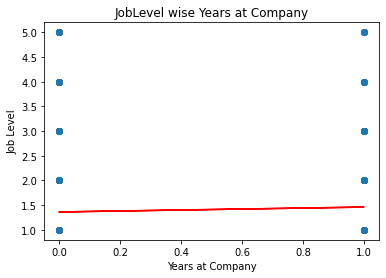

In [276]:
plt.title("JobLevel wise Years at Company")
plt.ylabel('Job Level')
plt.xlabel("Years at Company")


plt.scatter(X_train, y6_train)
plt.plot(X_train, 1.3636 + 0.0984*X_train, 'r')
plt.show()

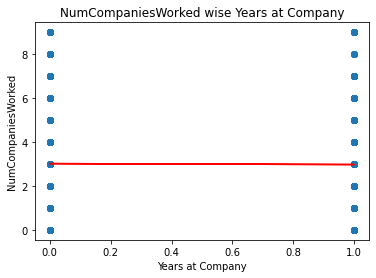

In [277]:
plt.title("NumCompaniesWorked wise Years at Company")
plt.ylabel('NumCompaniesWorked')
plt.xlabel("Years at Company")


plt.scatter(X_train, y5_train)
plt.plot(X_train, 3.0194 + -0.0429*X_train, 'r')
plt.show()

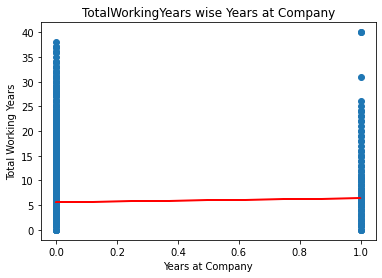

In [278]:
plt.title("TotalWorkingYears wise Years at Company")
plt.ylabel("Total Working Years")
plt.xlabel("Years at Company")


plt.scatter(X_train, y4_train)
plt.plot(X_train, 5.6011 + 0.8084*X_train, 'r')
plt.show()

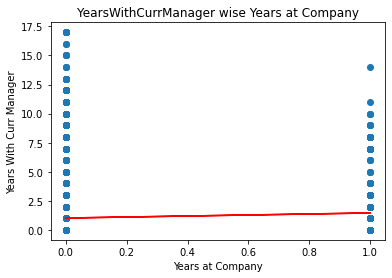

In [279]:
plt.title("YearsWithCurrManager wise Years at Company")
plt.ylabel("Years With Curr Manager")
plt.xlabel("Years at Company")


plt.scatter(X_train, y3_train)
plt.plot(X_train, 1.0222 + 0.4360*X_train, 'r')
plt.show()

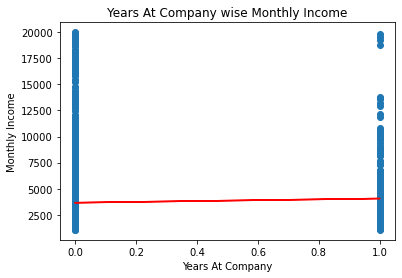

In [281]:
# Visualizing the regression line

plt.title("Years At Company wise Monthly Income")
plt.ylabel("Monthly Income")
plt.xlabel("Years At Company")


plt.scatter(X_train, y_train)
plt.plot(X_train, 3659.8718 + 401.1096*X_train, 'r')
plt.show()

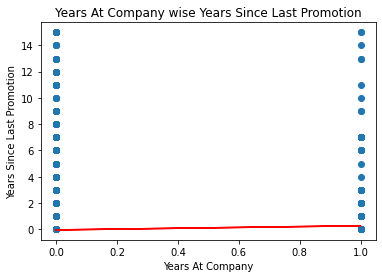

In [280]:
# Visualizing the regression line
plt.title("Years At Company wise Years Since Last Promotion")
plt.ylabel("Years Since Last Promotion")
plt.xlabel("Years At Company")

plt.scatter(X_train, y2_train)
plt.plot(X_train, -0.0498 + 0.3173*X_train, 'r')
plt.show()


<AxesSubplot:ylabel='Frequency'>

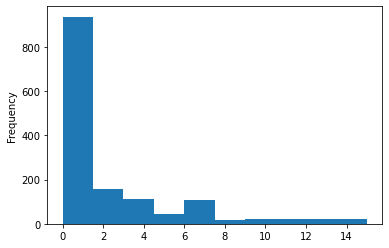

In [242]:
df['YearsSinceLastPromotion'].plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

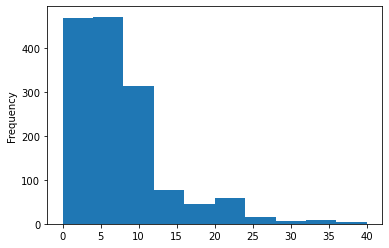

In [243]:
df['YearsAtCompany'].plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

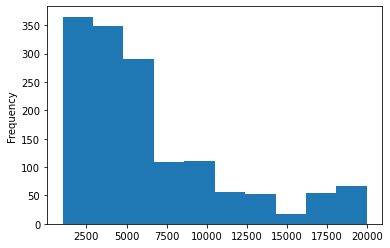

In [244]:
df['MonthlyIncome'].plot(kind='hist')

In [245]:
df.columns

Index(['Age', 'Attrition', 'Attrition Code', 'BusinessTravel',
       'Business Travel Code', 'DailyRate', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeCount', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'Gender Code', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'OverTime Code', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

<AxesSubplot:ylabel='Frequency'>

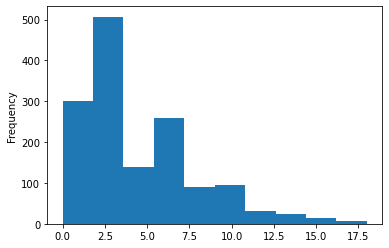

In [246]:

df['YearsInCurrentRole'].plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

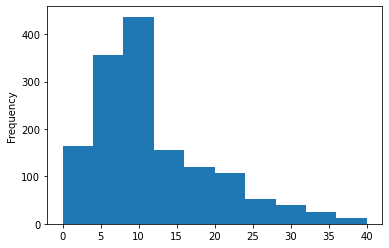

In [247]:
df['TotalWorkingYears'].plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

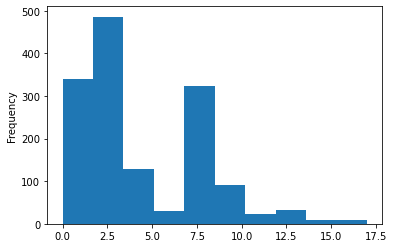

In [248]:
df['YearsWithCurrManager'].plot(kind='hist')

In [249]:
df.columns

Index(['Age', 'Attrition', 'Attrition Code', 'BusinessTravel',
       'Business Travel Code', 'DailyRate', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeCount', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'Gender Code', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'OverTime Code', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

<AxesSubplot:ylabel='Frequency'>

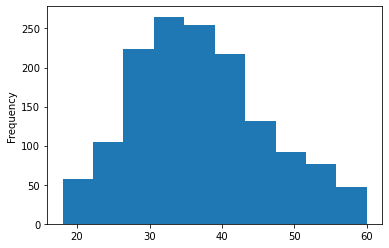

In [250]:
df['Age'].plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

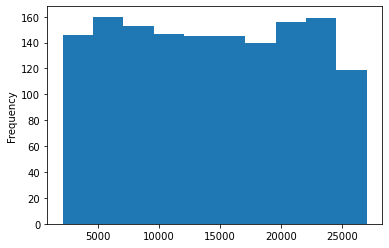

In [251]:
df['MonthlyRate'].plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

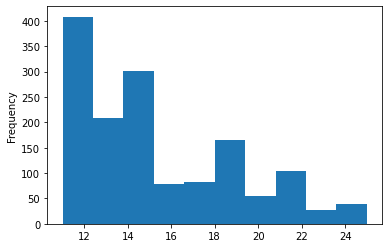

In [252]:
df['PercentSalaryHike'].plot(kind='hist')

In [253]:
df.describe()

,Age,Attrition Code,Business Travel Code,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender Code,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,0.161224,1.086395,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,0.400000,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,0.367863,0.532170,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,0.490065,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,0.000000,0.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,0.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,1.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,0.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.000000,1.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,0.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,0.000000,1.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,1.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1.000000,2.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,1.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [254]:
df_num = df.select_dtypes(include=[np.number])
df_num.shape

(1470, 30)

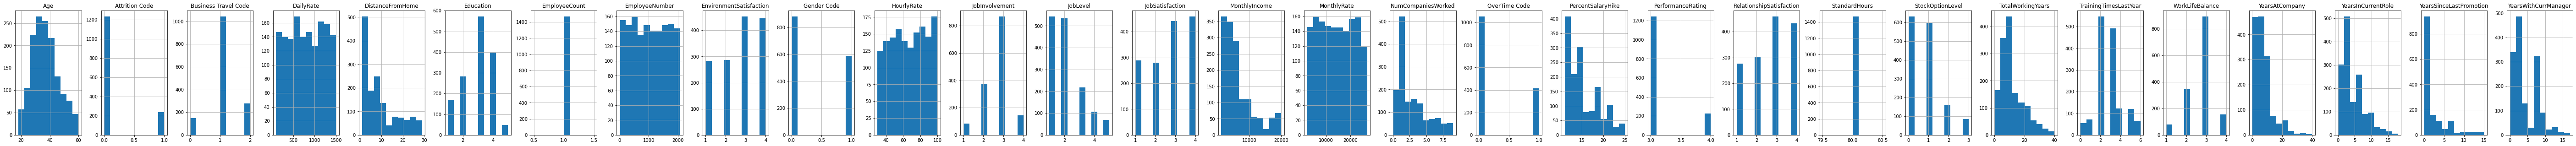

In [255]:
fig, axes = plt.subplots(1, len(df_num.columns), figsize=(100, 5))
for col, axis in zip(df_num.columns, axes):
    df.hist(column = col, bins = 10, ax=axis)

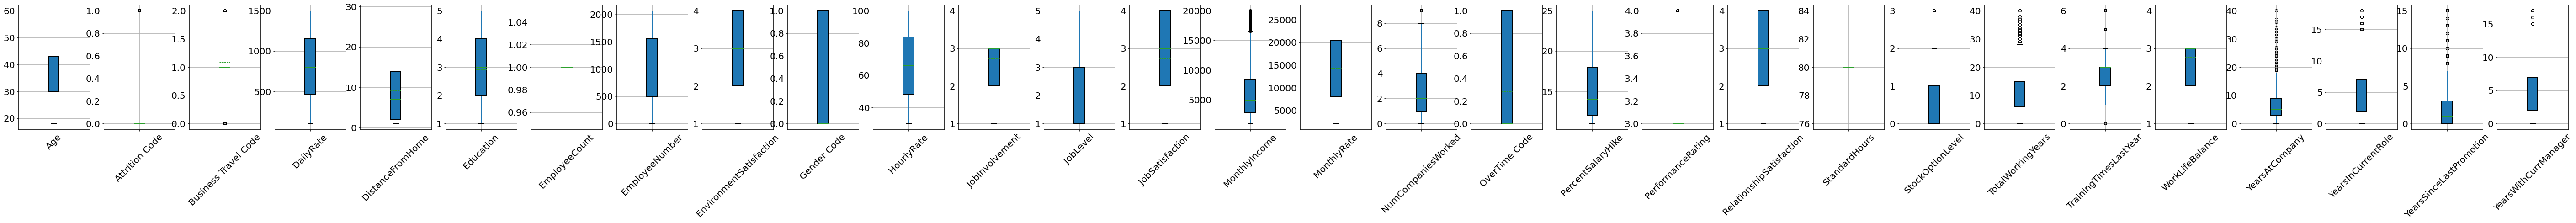

In [256]:
fig, axes = plt.subplots(1, len(df_num.columns), figsize=(100, 5))
for col, axis in zip(df_num.columns, axes):
    df.boxplot(column=col, fontsize=20, boxprops=dict(linewidth=2), showmeans=True, meanline=True, rot=45, ax=axis, patch_artist=True)
    
    

In [257]:
import math

df.median()

Age                            36.0
Attrition Code                  0.0
Business Travel Code            1.0
DailyRate                     802.0
DistanceFromHome                7.0
Education                       3.0
EmployeeCount                   1.0
EmployeeNumber               1020.5
EnvironmentSatisfaction         3.0
Gender Code                     0.0
HourlyRate                     66.0
JobInvolvement                  3.0
JobLevel                        2.0
JobSatisfaction                 3.0
MonthlyIncome                4919.0
MonthlyRate                 14235.5
NumCompaniesWorked              2.0
OverTime Code                   0.0
PercentSalaryHike              14.0
PerformanceRating               3.0
RelationshipSatisfaction        3.0
StandardHours                  80.0
StockOptionLevel                1.0
TotalWorkingYears              10.0
TrainingTimesLastYear           3.0
WorkLifeBalance                 3.0
YearsAtCompany                  5.0
YearsInCurrentRole          

In [258]:
df.mean().round()


Age                            37.0
Attrition Code                  0.0
Business Travel Code            1.0
DailyRate                     802.0
DistanceFromHome                9.0
Education                       3.0
EmployeeCount                   1.0
EmployeeNumber               1025.0
EnvironmentSatisfaction         3.0
Gender Code                     0.0
HourlyRate                     66.0
JobInvolvement                  3.0
JobLevel                        2.0
JobSatisfaction                 3.0
MonthlyIncome                6503.0
MonthlyRate                 14313.0
NumCompaniesWorked              3.0
OverTime Code                   0.0
PercentSalaryHike              15.0
PerformanceRating               3.0
RelationshipSatisfaction        3.0
StandardHours                  80.0
StockOptionLevel                1.0
TotalWorkingYears              11.0
TrainingTimesLastYear           3.0
WorkLifeBalance                 3.0
YearsAtCompany                  7.0
YearsInCurrentRole          

In [259]:
df.describe()

,Age,Attrition Code,Business Travel Code,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender Code,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,0.161224,1.086395,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,0.400000,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,0.367863,0.532170,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,0.490065,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,0.000000,0.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,0.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,1.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,0.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.000000,1.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,0.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,0.000000,1.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,1.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1.000000,2.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,1.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000
